In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel(r'C:\Users\Acer\Desktop\Flight\Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Automatic EDA

In [4]:
# import pandas_profiling as pf

In [5]:
# pf.ProfileReport(df)

# Manul EDA

In [6]:
df.shape

(10683, 11)

In [7]:
df.dtypes #checking the data types

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df.isna().sum() #Checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering
Let's convert Date_of_Journey to its appropriate format as datetime with regards to day and month


In [10]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


# Date_of_journey

In [11]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [12]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


In [13]:
#we can now drop the Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

# Dep_time

In [14]:
#covert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [15]:
#we can now drop the 'Dep_Time'
df.drop(["Dep_Time"],axis=1,inplace=True)

# Arrival_time

In [16]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [17]:
#we can now drop the 'Arrival_Time'
df.drop(["Arrival_Time"],axis=1,inplace=True)

# Duration Time

In [18]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the lastone (in this case the 'm')

In [19]:
#we can now drop the 'Duration'
df.drop(["Duration"],axis=1,inplace=True)

In [20]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00


In [21]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

# Count of Airlines

In [22]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Airline vs Price

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



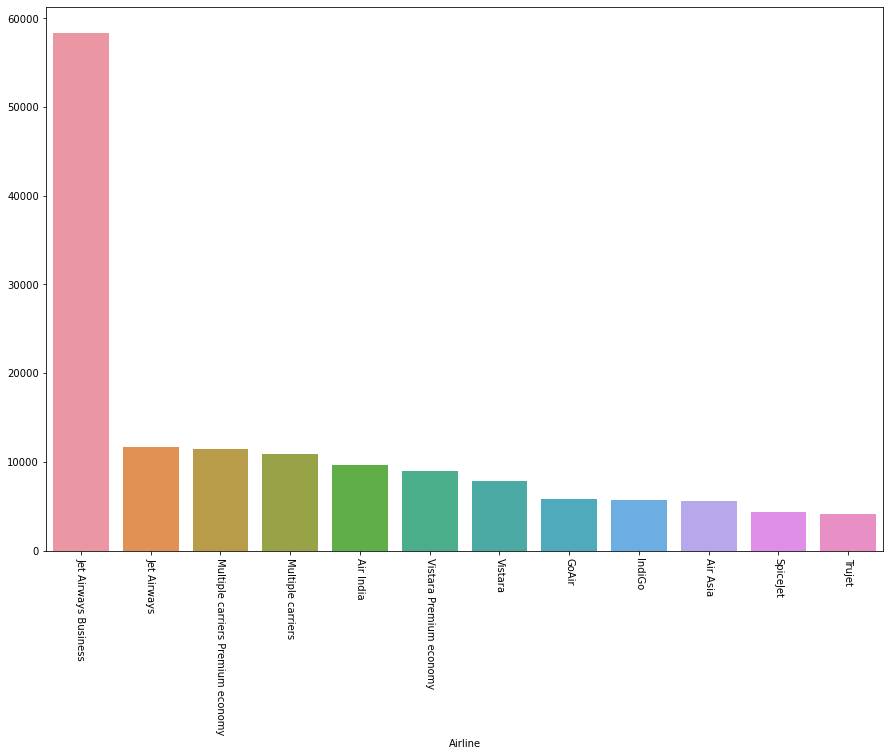

In [23]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)
plt.show()

# Insight:
Jet Airways Business has the highest price with Trujet having the lowest

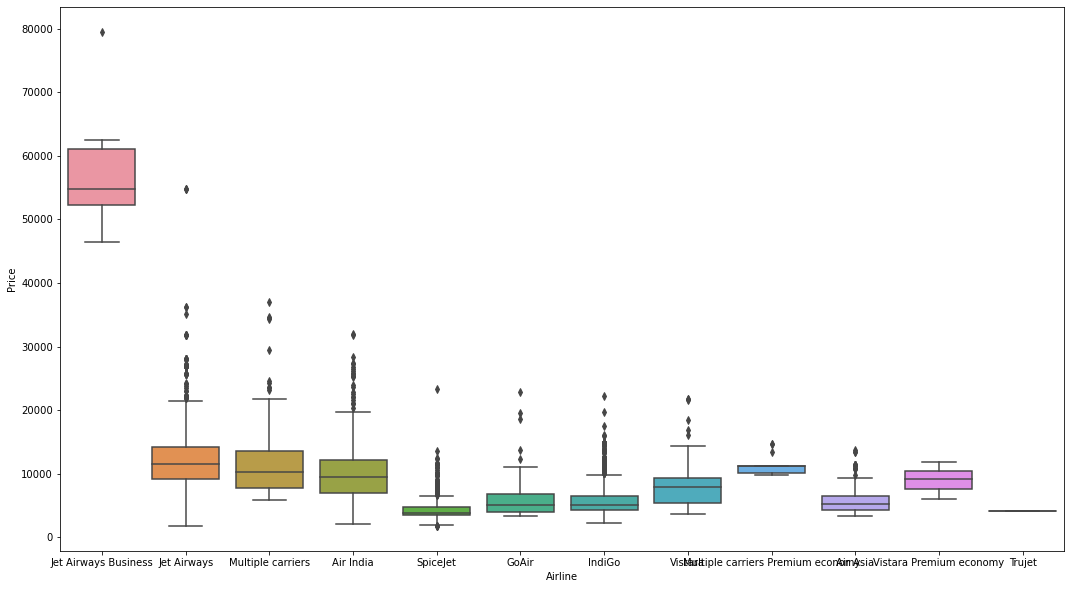

In [24]:
# Boxplot for Airline Vs Price
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show()

# Price based on number of stops

In [25]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

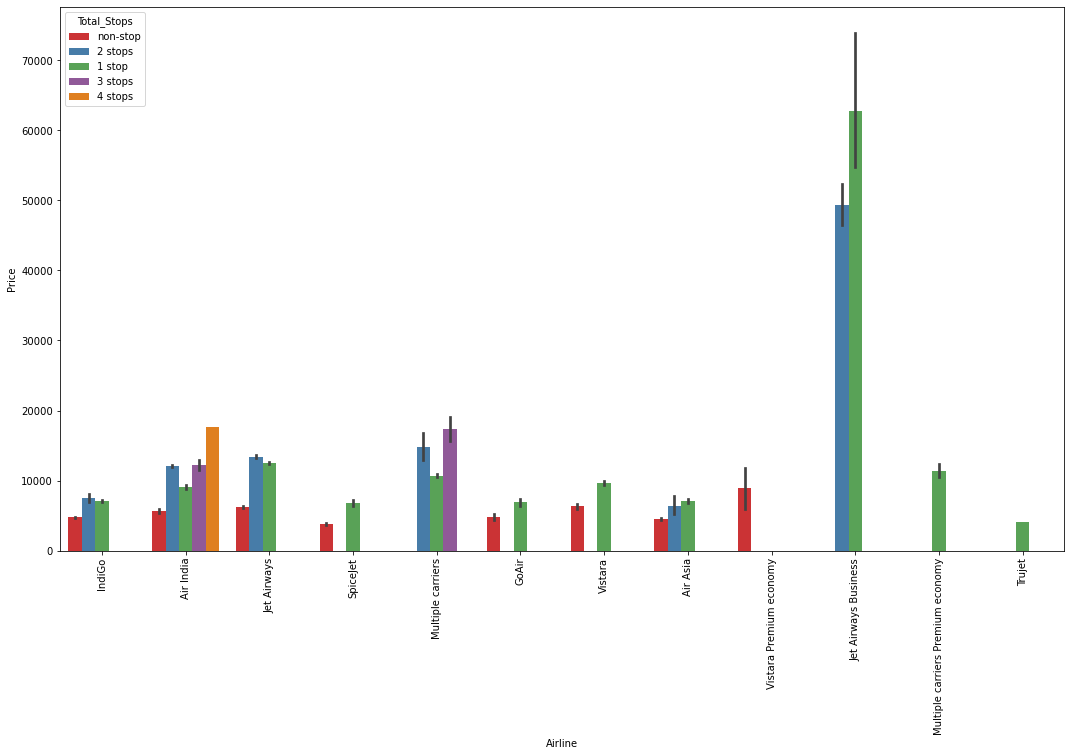

In [26]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# Insight:
One stop and two stops Jet Airways Business is having the highest price

In [27]:
# Source
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# Source vs Price

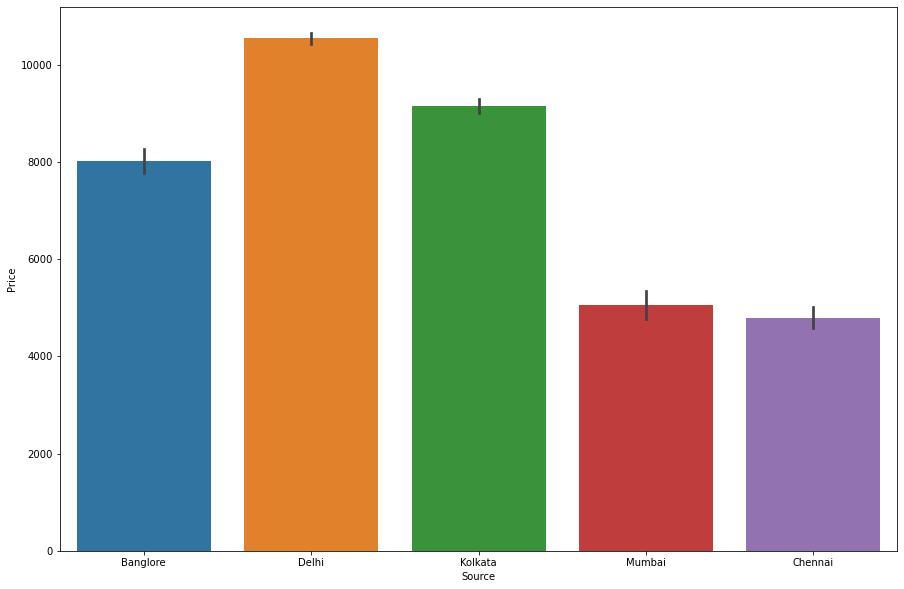

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

# Destination vs Price

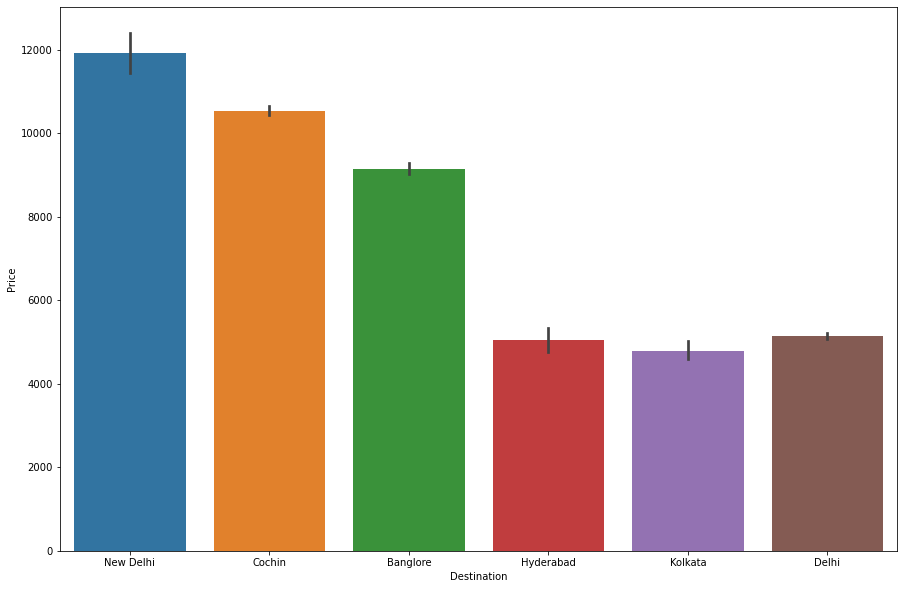

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [30]:
df['Destination'].value_counts() # Delhi & New Delhi should not be different

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
# Replace New Delhi with Delhi
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [32]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [33]:
# Reverify desination counts
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

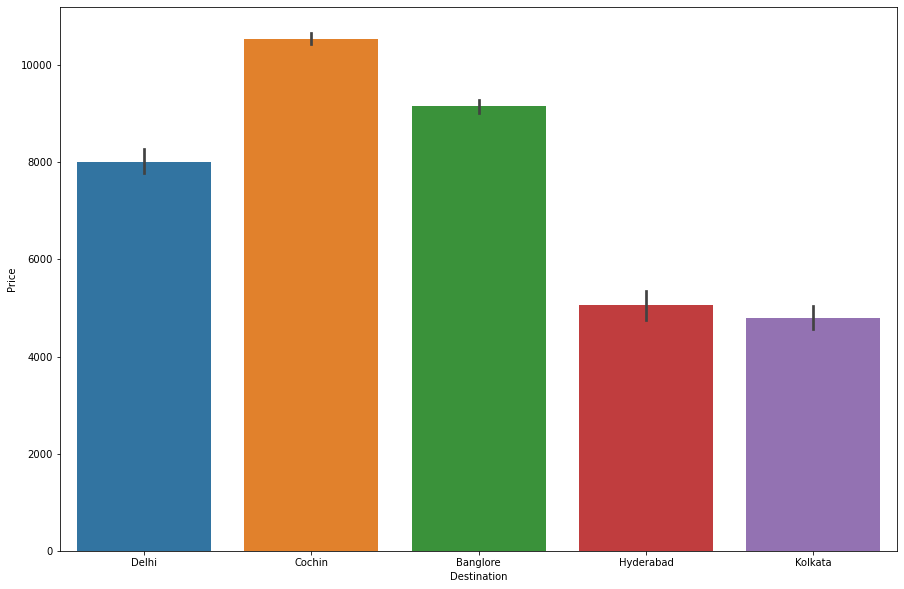

In [34]:
# Replotting Destination Vs Price plot
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

<AxesSubplot:>

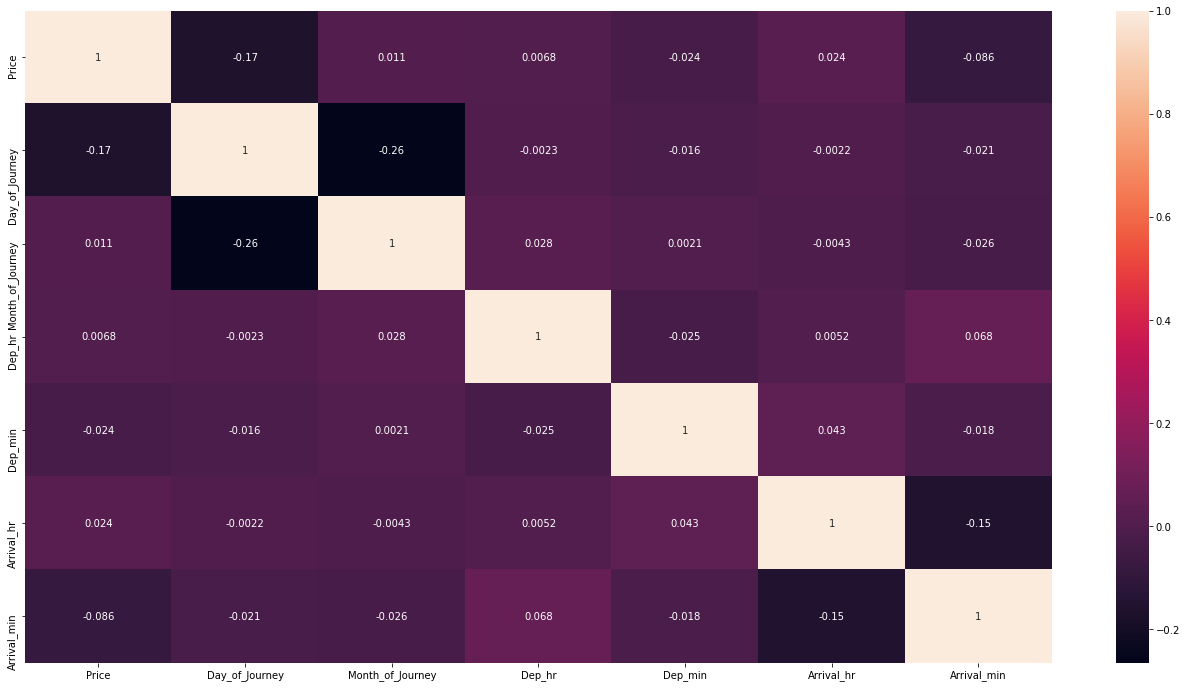

In [35]:
# Heatmap
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

# Insight:
The features are less correlated which is a good thing for us to avoid Multicollinearity

.................................
# Apply Onehot Encoding on the categorical variables

In [36]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [37]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,00


In [38]:
# Creating dummies for 'Airline','Source' & 'Destination'
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [39]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45


In [40]:
df.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [41]:
df.shape

(10682, 29)



# Test Data


In [42]:
df_test=pd.read_excel(r'C:\Users\Acer\Desktop\Flight\Test_set.xlsx')

In [43]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Let's Perform that same steps as we did for train data earlier

In [44]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time
a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non­stop':0, '2 stops':2, '1 stop':1, '3 stops':3,
'4 stops':4})
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [45]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [46]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 29)
test_shape (2671, 28)


In [47]:
# Set x and y in train data
x=df.drop(['Price'],axis=1)
y=df['Price']

In [48]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


# Model Building and Hyperparameter Tuning

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

# Feature Importance

<AxesSubplot:>

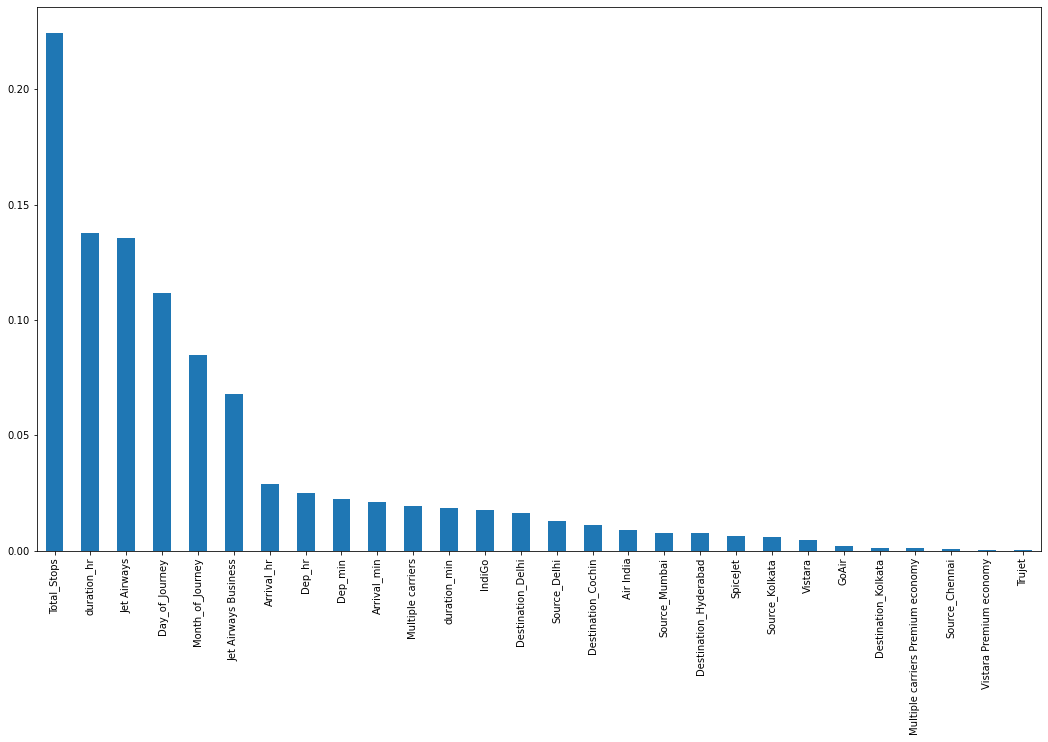

In [51]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',
figsize=(18,10))

#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

# Extra Tree Regression

In [56]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)

ExtraTreesRegressor(n_estimators=120)

In [57]:
# prediction
y_predict=ET_Model.predict(X_test)

In [58]:
# accuracy
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7660035440094652

# RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
# prediction
y_predict=RF_Model.predict(X_test)

In [61]:
# accuracy
r2_score(y_test,y_predict)

0.7917527159834558

# Hyperparameter

In [62]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
# create random grid
rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf=RandomForestRegressor()
rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',
                       n_iter=10,cv=3,random_state=42, n_jobs = 1)

In [63]:
# Fit Randomsearchcv
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [64]:
# prediction
rf_pred=rCV.predict(X_test)
rf_pred

array([12562.39941595,  4289.6447317 ,  6129.58616883, ...,
       11645.4839229 ,  9721.77442622,  8661.28660034])

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1157.1344704115807
MSE 3970996.795644208


In [66]:
r2_score(y_test,rf_pred)

0.8066105208973052

# CATBOOST

In [68]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.05718
0:	learn: 4466.5316537	total: 155ms	remaining: 2m 34s
1:	learn: 4319.1952920	total: 171ms	remaining: 1m 25s
2:	learn: 4170.0874200	total: 176ms	remaining: 58.6s
3:	learn: 4033.1061207	total: 184ms	remaining: 45.8s
4:	learn: 3909.5332929	total: 190ms	remaining: 37.8s
5:	learn: 3788.8771850	total: 195ms	remaining: 32.3s
6:	learn: 3677.5795256	total: 200ms	remaining: 28.4s
7:	learn: 3585.9715553	total: 207ms	remaining: 25.7s
8:	learn: 3499.6424958	total: 211ms	remaining: 23.3s
9:	learn: 3408.9602975	total: 217ms	remaining: 21.5s
10:	learn: 3329.4018172	total: 228ms	remaining: 20.5s
11:	learn: 3258.4306577	total: 233ms	remaining: 19.2s
12:	learn: 3188.9732731	total: 239ms	remaining: 18.1s
13:	learn: 3126.6519374	total: 256ms	remaining: 18s
14:	learn: 3064.8092738	total: 262ms	remaining: 17.2s
15:	learn: 3011.9738031	total: 267ms	remaining: 16.4s
16:	learn: 2960.0953295	total: 272ms	remaining: 15.8s
17:	learn: 2917.5532184	total: 279ms	remaining: 15.2s
18:	learn

162:	learn: 1945.1133182	total: 1.18s	remaining: 6.05s
163:	learn: 1942.7228013	total: 1.18s	remaining: 6.03s
164:	learn: 1940.9073624	total: 1.19s	remaining: 6.03s
165:	learn: 1938.0460170	total: 1.2s	remaining: 6.04s
166:	learn: 1935.3286398	total: 1.21s	remaining: 6.03s
167:	learn: 1932.9545795	total: 1.21s	remaining: 6.01s
168:	learn: 1931.6124443	total: 1.22s	remaining: 6.01s
169:	learn: 1929.5307514	total: 1.23s	remaining: 6s
170:	learn: 1927.4963218	total: 1.24s	remaining: 5.99s
171:	learn: 1925.4669384	total: 1.24s	remaining: 5.97s
172:	learn: 1924.3200339	total: 1.25s	remaining: 5.96s
173:	learn: 1922.7154464	total: 1.26s	remaining: 5.96s
174:	learn: 1920.9589969	total: 1.26s	remaining: 5.95s
175:	learn: 1919.1457003	total: 1.27s	remaining: 5.94s
176:	learn: 1918.1069516	total: 1.27s	remaining: 5.92s
177:	learn: 1916.2214512	total: 1.28s	remaining: 5.91s
178:	learn: 1913.5124519	total: 1.28s	remaining: 5.89s
179:	learn: 1911.4800432	total: 1.29s	remaining: 5.87s
180:	learn: 19

313:	learn: 1749.6952143	total: 1.95s	remaining: 4.26s
314:	learn: 1749.1317173	total: 1.96s	remaining: 4.25s
315:	learn: 1747.8635196	total: 1.96s	remaining: 4.24s
316:	learn: 1746.1192150	total: 1.97s	remaining: 4.24s
317:	learn: 1745.9081839	total: 1.97s	remaining: 4.22s
318:	learn: 1745.5901590	total: 1.97s	remaining: 4.21s
319:	learn: 1745.5765557	total: 1.98s	remaining: 4.2s
320:	learn: 1744.1031020	total: 1.98s	remaining: 4.19s
321:	learn: 1742.8866256	total: 1.99s	remaining: 4.18s
322:	learn: 1741.8273962	total: 1.99s	remaining: 4.17s
323:	learn: 1740.8624193	total: 2s	remaining: 4.17s
324:	learn: 1739.2263355	total: 2s	remaining: 4.16s
325:	learn: 1738.2951082	total: 2.01s	remaining: 4.15s
326:	learn: 1737.8994124	total: 2.01s	remaining: 4.14s
327:	learn: 1737.2891842	total: 2.02s	remaining: 4.13s
328:	learn: 1736.2589351	total: 2.02s	remaining: 4.13s
329:	learn: 1735.4256185	total: 2.03s	remaining: 4.13s
330:	learn: 1735.2946332	total: 2.04s	remaining: 4.12s
331:	learn: 1734.

484:	learn: 1615.6639556	total: 2.77s	remaining: 2.94s
485:	learn: 1615.0438262	total: 2.77s	remaining: 2.93s
486:	learn: 1614.3352333	total: 2.77s	remaining: 2.92s
487:	learn: 1614.3024114	total: 2.78s	remaining: 2.92s
488:	learn: 1613.6410348	total: 2.78s	remaining: 2.91s
489:	learn: 1612.8816057	total: 2.79s	remaining: 2.9s
490:	learn: 1612.5222079	total: 2.79s	remaining: 2.9s
491:	learn: 1611.5621219	total: 2.8s	remaining: 2.89s
492:	learn: 1610.8252079	total: 2.8s	remaining: 2.88s
493:	learn: 1609.9525343	total: 2.81s	remaining: 2.88s
494:	learn: 1608.4691461	total: 2.81s	remaining: 2.87s
495:	learn: 1607.9883122	total: 2.82s	remaining: 2.86s
496:	learn: 1607.2751655	total: 2.82s	remaining: 2.86s
497:	learn: 1606.8330984	total: 2.83s	remaining: 2.85s
498:	learn: 1606.8248170	total: 2.83s	remaining: 2.85s
499:	learn: 1606.2762544	total: 2.84s	remaining: 2.84s
500:	learn: 1605.7741311	total: 2.84s	remaining: 2.83s
501:	learn: 1604.7832547	total: 2.85s	remaining: 2.83s
502:	learn: 16

660:	learn: 1514.3504639	total: 3.58s	remaining: 1.83s
661:	learn: 1514.3229831	total: 3.58s	remaining: 1.83s
662:	learn: 1513.6007305	total: 3.59s	remaining: 1.82s
663:	learn: 1513.0918781	total: 3.59s	remaining: 1.82s
664:	learn: 1512.7977061	total: 3.6s	remaining: 1.81s
665:	learn: 1512.4112519	total: 3.6s	remaining: 1.8s
666:	learn: 1512.1090491	total: 3.6s	remaining: 1.8s
667:	learn: 1511.3236721	total: 3.61s	remaining: 1.79s
668:	learn: 1510.6262787	total: 3.62s	remaining: 1.79s
669:	learn: 1510.6236099	total: 3.62s	remaining: 1.78s
670:	learn: 1509.8371387	total: 3.62s	remaining: 1.78s
671:	learn: 1509.2874087	total: 3.63s	remaining: 1.77s
672:	learn: 1509.2834648	total: 3.63s	remaining: 1.77s
673:	learn: 1509.2783078	total: 3.64s	remaining: 1.76s
674:	learn: 1508.6425759	total: 3.64s	remaining: 1.75s
675:	learn: 1507.9908505	total: 3.65s	remaining: 1.75s
676:	learn: 1507.4353868	total: 3.65s	remaining: 1.74s
677:	learn: 1506.6989363	total: 3.66s	remaining: 1.74s
678:	learn: 150

838:	learn: 1444.9731111	total: 4.39s	remaining: 843ms
839:	learn: 1444.6856308	total: 4.39s	remaining: 837ms
840:	learn: 1444.6836141	total: 4.4s	remaining: 832ms
841:	learn: 1444.2557845	total: 4.4s	remaining: 826ms
842:	learn: 1443.9635568	total: 4.41s	remaining: 821ms
843:	learn: 1443.5793488	total: 4.41s	remaining: 816ms
844:	learn: 1443.2765572	total: 4.42s	remaining: 810ms
845:	learn: 1442.9203917	total: 4.42s	remaining: 805ms
846:	learn: 1442.5857041	total: 4.43s	remaining: 800ms
847:	learn: 1441.7708073	total: 4.43s	remaining: 794ms
848:	learn: 1441.5323425	total: 4.44s	remaining: 789ms
849:	learn: 1441.1731914	total: 4.44s	remaining: 784ms
850:	learn: 1440.7375024	total: 4.45s	remaining: 779ms
851:	learn: 1440.4006677	total: 4.45s	remaining: 773ms
852:	learn: 1440.3015257	total: 4.46s	remaining: 768ms
853:	learn: 1440.2978302	total: 4.46s	remaining: 763ms
854:	learn: 1439.9885696	total: 4.47s	remaining: 758ms
855:	learn: 1439.8309625	total: 4.47s	remaining: 753ms
856:	learn: 

In [69]:
# Prediction
cat_pred=cat.predict(X_test)

In [70]:
# Accuracy
r2_score(y_test,cat_pred)

0.8301928561140887

# LightGbm Regressor

In [72]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [73]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [74]:
# Prediction
lgb_pred=lgb_model.predict(X_test)

In [75]:
# Accuracy
r2_score(y_test,lgb_pred)

0.8030064936005559

### Catboost is the best model with accuracy of 0.83

In [76]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


# Use pickle to save our model so that we can use it later

In [78]:
import pickle 

# Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [79]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [83]:
# save clean data in'df_clean'
df.to_csv('df_clean.csv')